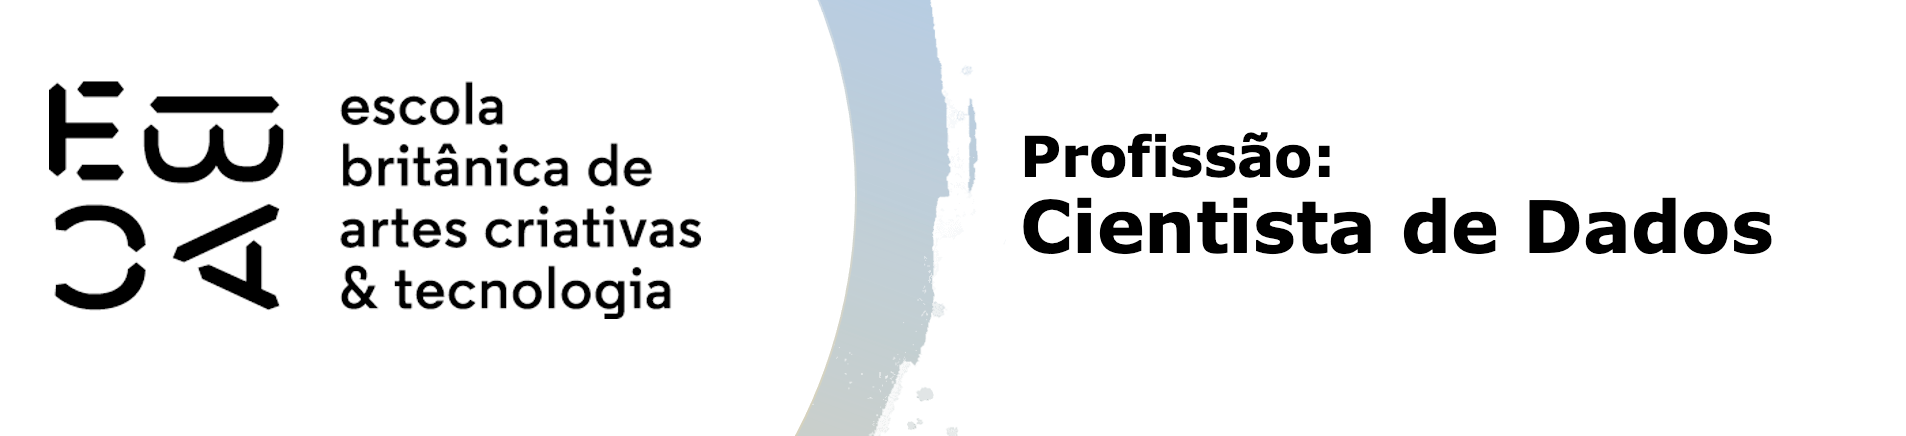

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from tqdm.notebook import tqdm


In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.head(20)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [4]:
df.Revenue.value_counts(dropna=False)

False    10422
True      1908
Name: Revenue, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [5]:
df.info() # existem 2 variáveis que são strings (Month e VisitorType)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
df.isna().sum() # não há missing a serem tratados

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [7]:
df_spotlight=df.loc[:,'Administrative':'ProductRelated_Duration']
df_spotlight

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
0,0,0.0,0,0.0,1,0.000000
1,0,0.0,0,0.0,2,64.000000
2,0,0.0,0,0.0,1,0.000000
3,0,0.0,0,0.0,2,2.666667
4,0,0.0,0,0.0,10,627.500000
...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667
12326,0,0.0,0,0.0,5,465.750000
12327,0,0.0,0,0.0,6,184.250000
12328,4,75.0,0,0.0,15,346.000000


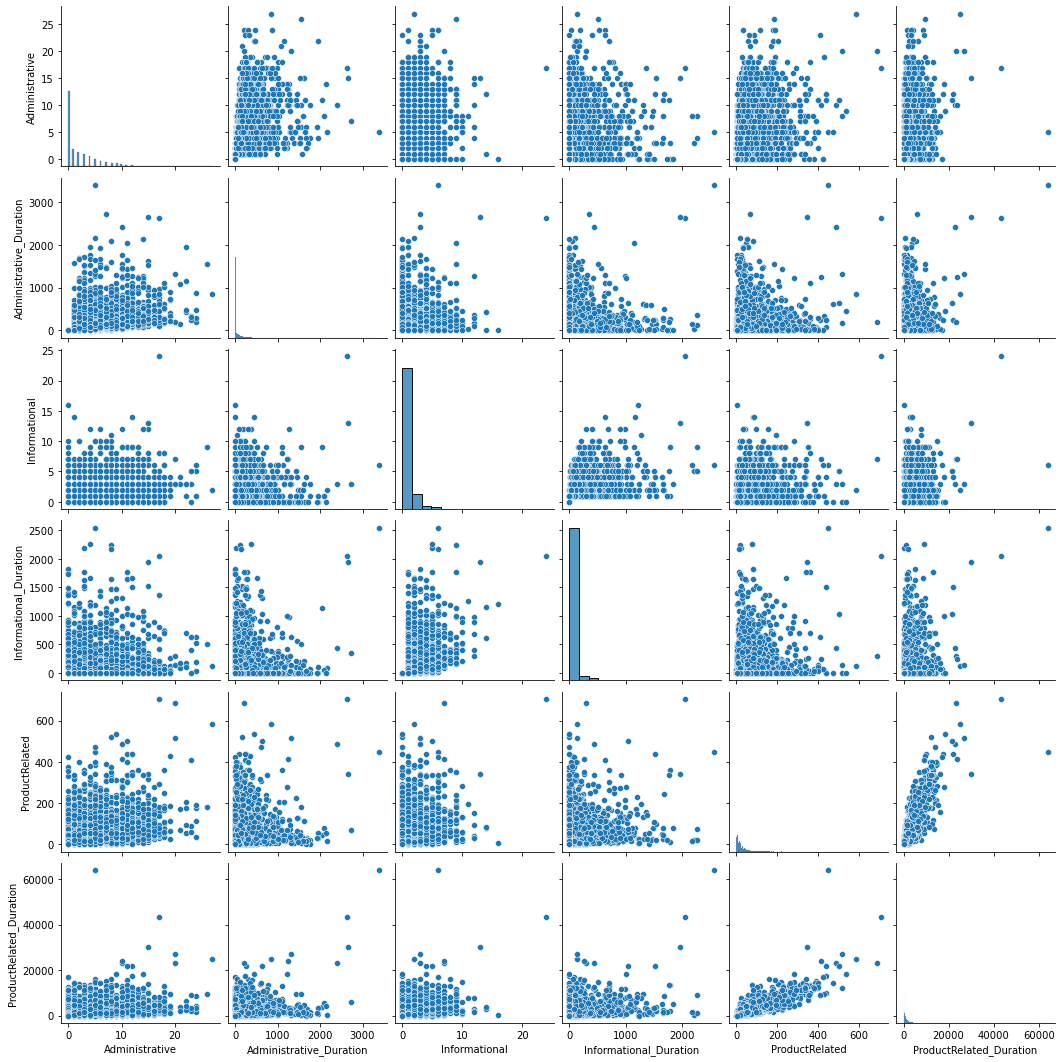

In [8]:
sns.pairplot(df_spotlight)

In [9]:
#  Padronizando as medidas (métricas)

df_spotlight_standardized = pd.DataFrame(StandardScaler().fit_transform(df_spotlight),columns = df_spotlight.columns) 
df_spotlight_standardized

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430
...,...,...,...,...,...,...
12325,0.206173,0.363075,-0.396478,-0.244931,0.478227,0.307822
12326,-0.696993,-0.457191,-0.396478,-0.244931,-0.601062,-0.380957
12327,-0.696993,-0.457191,-0.396478,-0.244931,-0.578577,-0.528063
12328,0.507228,-0.032916,-0.396478,-0.244931,-0.376210,-0.443536


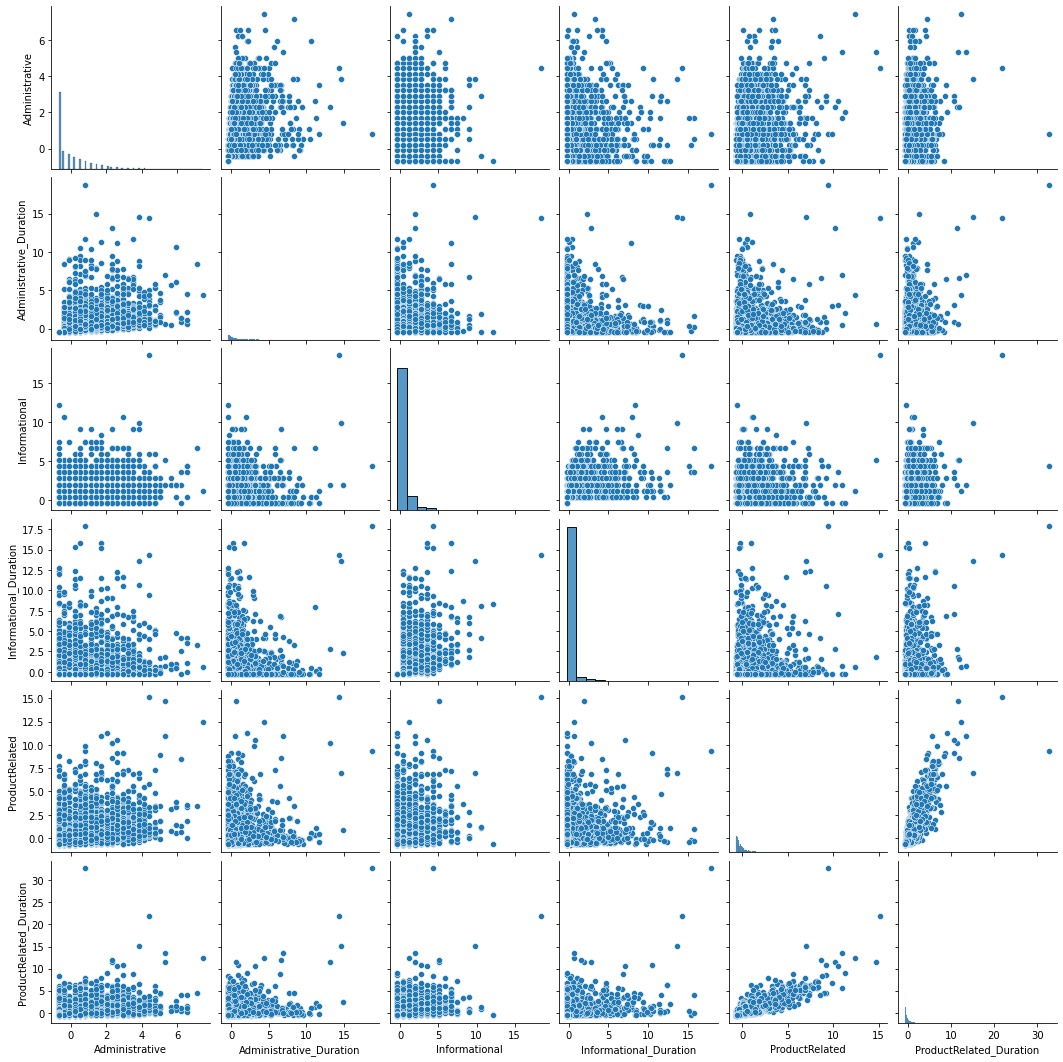

In [10]:
sns.pairplot(df_spotlight_standardized)

## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

In [11]:
# método do cotovelo (SQD ou SSD)

SQD = []
K = range(1,10)
for k in tqdm(K):
    km = KMeans(n_clusters=k)
    km = km.fit(df_spotlight_standardized)
    SQD.append(km.inertia_)


  0%|          | 0/9 [00:00<?, ?it/s]

In [12]:
SQD

[73979.99999999997,
 51210.55819891585,
 43201.82226028566,
 37325.99974986017,
 33467.67120292963,
 29687.926639128433,
 26739.196740222767,
 24157.107914489225,
 22490.822759575913]

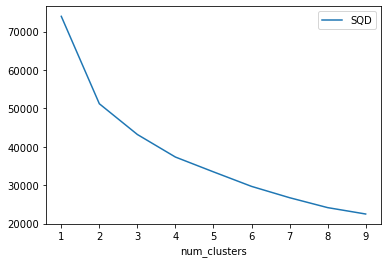

In [13]:
df1 = pd.DataFrame({'num_clusters':list(range(1, len(SQD)+1)), 'SQD': SQD})
df1.plot(x = 'num_clusters', y = 'SQD');

Pelo método do coltovelo (SQD ou SSD), chegamos ao número de Clusters igual a 2.

In [14]:
variables = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
            'ProductRelated', 'ProductRelated_Duration']

In [15]:
# pelo método da Silueta

siluetas = []
max_clusters = 10
for n_clusters in tqdm(range(2, max_clusters+1)):
    km = KMeans(n_clusters=n_clusters, random_state=10).fit(df_spotlight_standardized[variables])
    siluetas.append(silhouette_score(df_spotlight_standardized[variables], km.labels_))
    nomes_grupos = ['grupo_' + str(g) for g in range(n_clusters)]
    df_spotlight_standardized['grupos_'+str(n_clusters)] = pd.Categorical.from_codes(km.labels_,
                                                                        categories = nomes_grupos)

  0%|          | 0/9 [00:00<?, ?it/s]

<AxesSubplot:xlabel='n_clusters'>

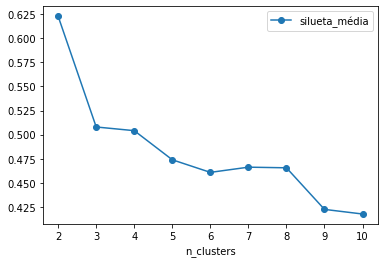

In [16]:
df_silueta = pd.DataFrame({'n_clusters': list(range(2, max_clusters+1)), 'silueta_média': siluetas})

df_silueta.plot.line(x = 'n_clusters', y = 'silueta_média', marker='o')
#plt.scatter(x = df_silueta.n_clusters, y = df_silueta.silueta_média)

Pelo método da silhueta, o melhor número de clusters é 2.

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [17]:
df1 = df_spotlight_standardized[variables]

In [18]:
# K-means (análise não superviosionada) utilizando número de grupos igual a 2.

kmeans_1 = KMeans(n_clusters=2)
kmeans_1.fit(df1)

KMeans(n_clusters=2)

/tmp/ipykernel_10417/2316160108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['grupo'] = kmeans_1.labels_.astype('str')


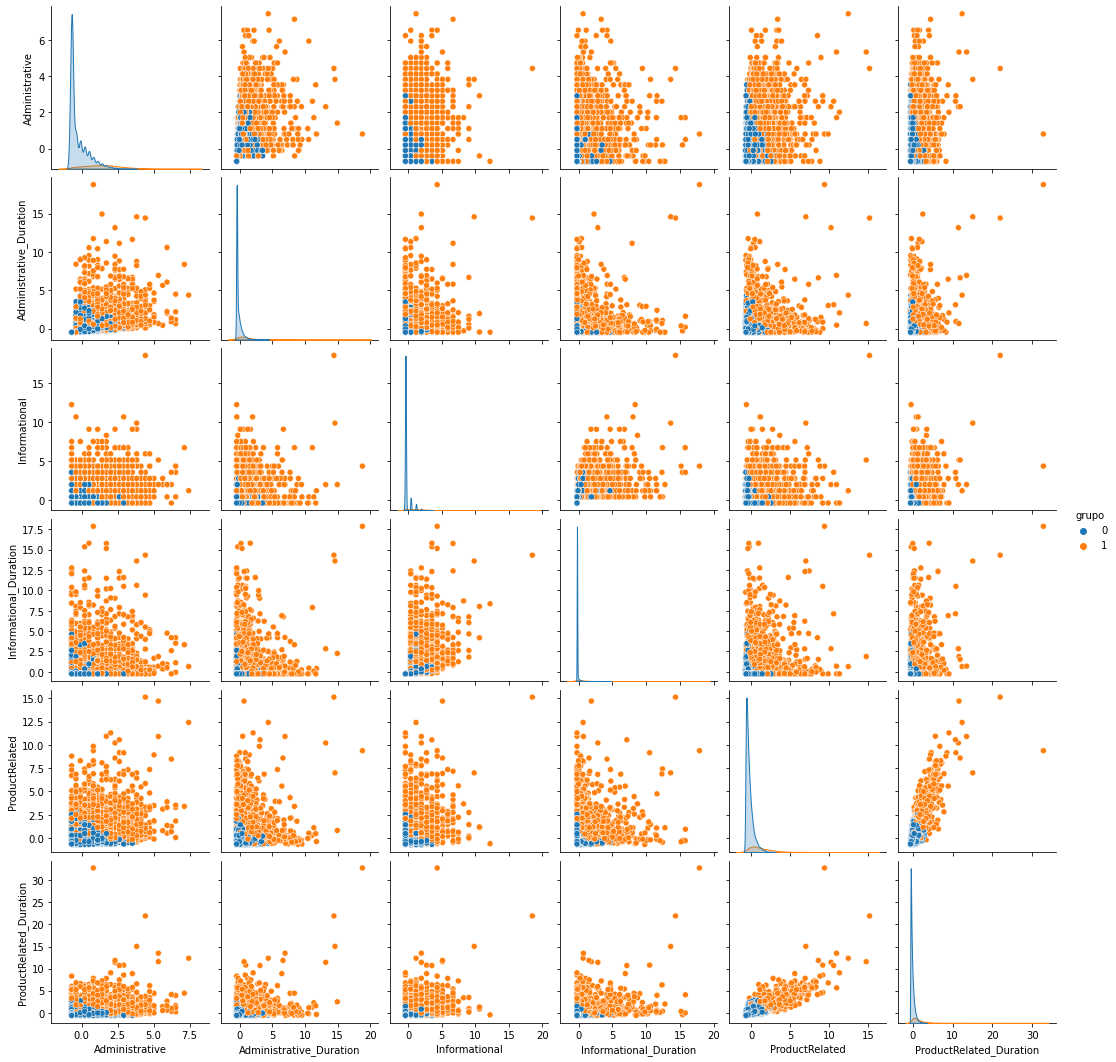

In [19]:
df1['grupo'] = kmeans_1.labels_.astype('str')
sns.pairplot(df1, hue = 'grupo')

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  float64
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  float64
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  float64
 5   ProductRelated_Duration  12330 non-null  float64
 6   grupo                    12330 non-null  object 
dtypes: float64(6), object(1)
memory usage: 674.4+ KB


In [21]:
df_spotlight1 = pd.concat([df_spotlight[variables],df1[['grupo']]], axis=1)

df_spotlight1.loc[df_spotlight1['Administrative']>0, 'Types_of_access']='Administrative'
df_spotlight1.loc[df_spotlight1['Informational']>0, 'Types_of_access']='Informational'
df_spotlight1.loc[df_spotlight1['ProductRelated']>0, 'Types_of_access']='ProductRelated'

pd.crosstab(df_spotlight1['grupo'], df_spotlight1['Types_of_access'])


Types_of_access,Administrative,Informational,ProductRelated
grupo,,,
0,24,8,10542
1,0,0,1750


In [22]:
# K-means (análise não superviosionada) utilizando número de grupos igual a 3.

df2 = df_spotlight_standardized[variables]

kmeans_2 = KMeans(n_clusters=3)
kmeans_2.fit(df2)

KMeans(n_clusters=3)

/tmp/ipykernel_10417/2783422546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['grupo'] = kmeans_2.labels_.astype('str')


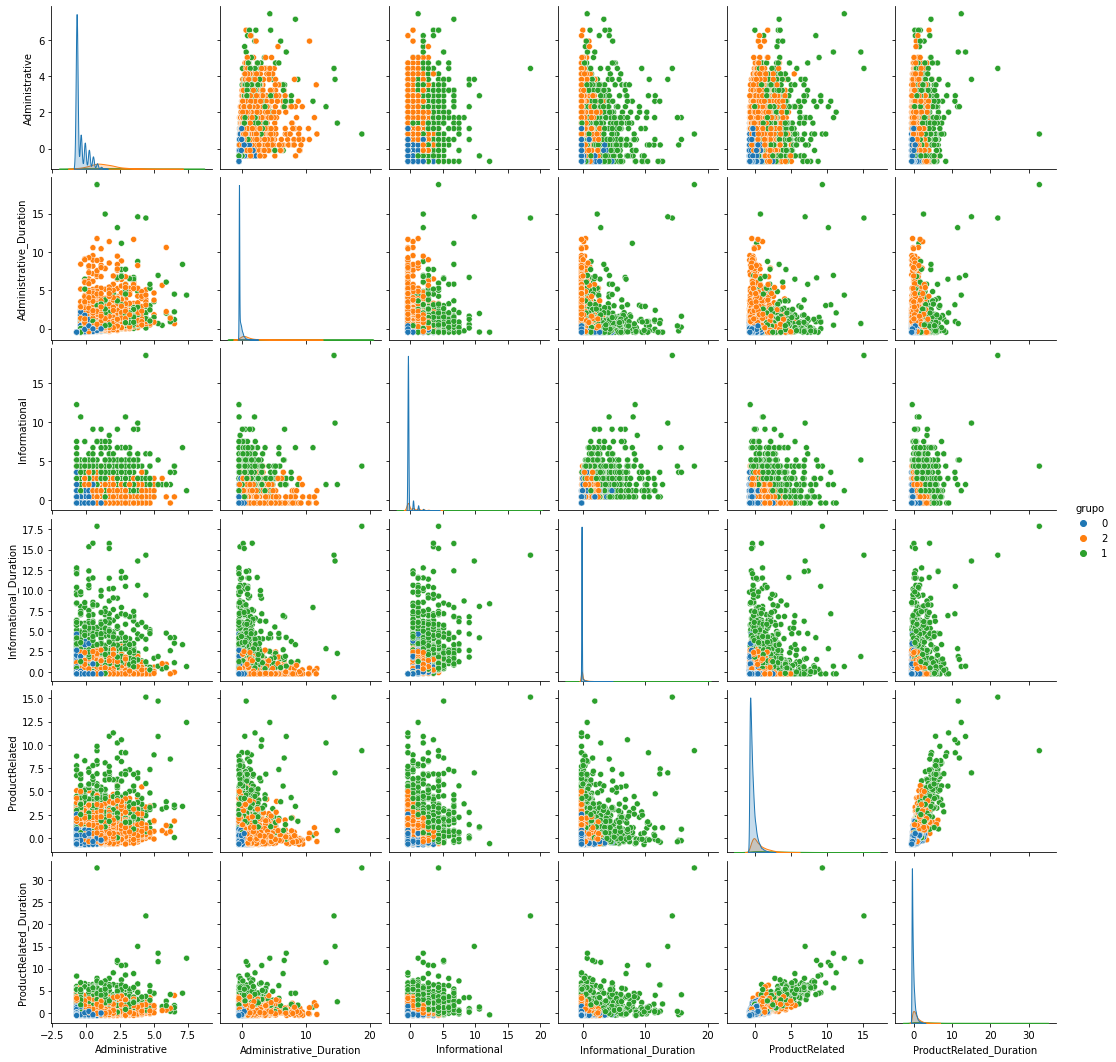

In [26]:
df2['grupo'] = kmeans_2.labels_.astype('str')
sns.pairplot(df2, hue = 'grupo')

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  float64
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  float64
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  float64
 5   ProductRelated_Duration  12330 non-null  float64
 6   grupo                    12330 non-null  object 
dtypes: float64(6), object(1)
memory usage: 674.4+ KB


In [29]:
df_spotlight2 = pd.concat([df_spotlight[variables],df2[['grupo']]], axis=1)

df_spotlight2.loc[df_spotlight2['Administrative']>0, 'Types_of_access']='Administrative'
df_spotlight2.loc[df_spotlight2['Informational']>0, 'Types_of_access']='Informational'
df_spotlight2.loc[df_spotlight2['ProductRelated']>0, 'Types_of_access']='ProductRelated'

pd.crosstab(df_spotlight2['grupo'], df_spotlight2['Types_of_access'])


Types_of_access,Administrative,Informational,ProductRelated
grupo,,,
0,24,8,9295
1,0,0,548
2,0,0,2449


Através das análises anteriores, o agrupamento final ficou sendo o de 2 clusters, visto que estes grupos encontram melhor agrupados em relação ao de 3 clusters, que apresenta mais espalhados, ou seja, alguns agrupamentos não são tão nítidos.

Através das análises das tabelas cruzadas (crosstab) não foi possível sugerir algum nome para os grupos. Isto porque, no grupo zero, encontram aqueles tanto os acessos administratvios, informativos e de produtos (este último em quantidade considerável), enquanto que no grupo 1 há apenas acessos de produtos.

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [30]:
df_spotlight1 = pd.concat([df_spotlight1,df[['BounceRates', 'Revenue']]], axis=1)
df_spotlight1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,grupo,Types_of_access,BounceRates,Revenue
0,0,0.0,0,0.0,1,0.000000,0,ProductRelated,0.20,False
1,0,0.0,0,0.0,2,64.000000,0,ProductRelated,0.00,False
2,0,0.0,0,0.0,1,0.000000,0,ProductRelated,0.20,False
3,0,0.0,0,0.0,2,2.666667,0,ProductRelated,0.05,False
4,0,0.0,0,0.0,10,627.500000,0,ProductRelated,0.02,False


In [31]:
pd.crosstab(df_spotlight1['BounceRates'], df_spotlight1['grupo'])

grupo,0,1
BounceRates,,
0.000000,5121,397
0.000027,0,1
0.000034,0,1
0.000038,0,1
0.000039,0,1
...,...,...
0.175000,1,0
0.176923,1,0
0.180000,5,0


In [32]:
pd.crosstab(df_spotlight1['Revenue'], df_spotlight1['grupo'])

grupo,0,1
Revenue,,
False,9151,1271
True,1429,479


In [33]:
1429/(9149+1429) #grupo zero - percentagem de vendas ocorridas neste grupo

0.13509169975420685

In [34]:
479/(1273+479) #grupo um - percentagem de vendas ocorridas neste grupo

0.2734018264840183

Verifica-se que percentualmente houve mais vendas no grupo 1 ( grupo em números de acesso bem menor em relação ao grupo 0). A venda no grupo 1 corresponde à 27% do seu total. Já a venda no grupo 0 corresponde a 13,5% do seu total. 